Command run to generate data:

```bash
python app/process.py \
    --input_dir=/media/ssd/drinnenb/202008-settling \
    --output_dir=/media/ssd/drinnenb/202008-settling-output \
    --recording=20200822TEST:2p15Hz-000 \
    --preprocess \
    --settle_time=5 \
    --artefact_shift=5 \
    --artefact_buffer=2
```

In [12]:
base_dir = r'F:\AD\output\20210204M156\slm-000'
nsamples = 5

In [13]:
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

artefact_h5 = f'{base_dir}/output/artefact.h5'
uncorrected_h5 = f'{base_dir}/hdf5/uncorrected/uncorrected.h5'
corrected_h5 = f'{base_dir}/hdf5/data/data.h5'

artefact = pd.read_hdf(artefact_h5, 'data')

with h5py.File(uncorrected_h5, 'r') as hf:
    uncorrected = hf['data'][()]

with h5py.File(corrected_h5, 'r') as hf:
    corrected = hf['data'][()]
    
samples = artefact.sample(nsamples).reset_index().sort_values(['frame', 'z_plane'])


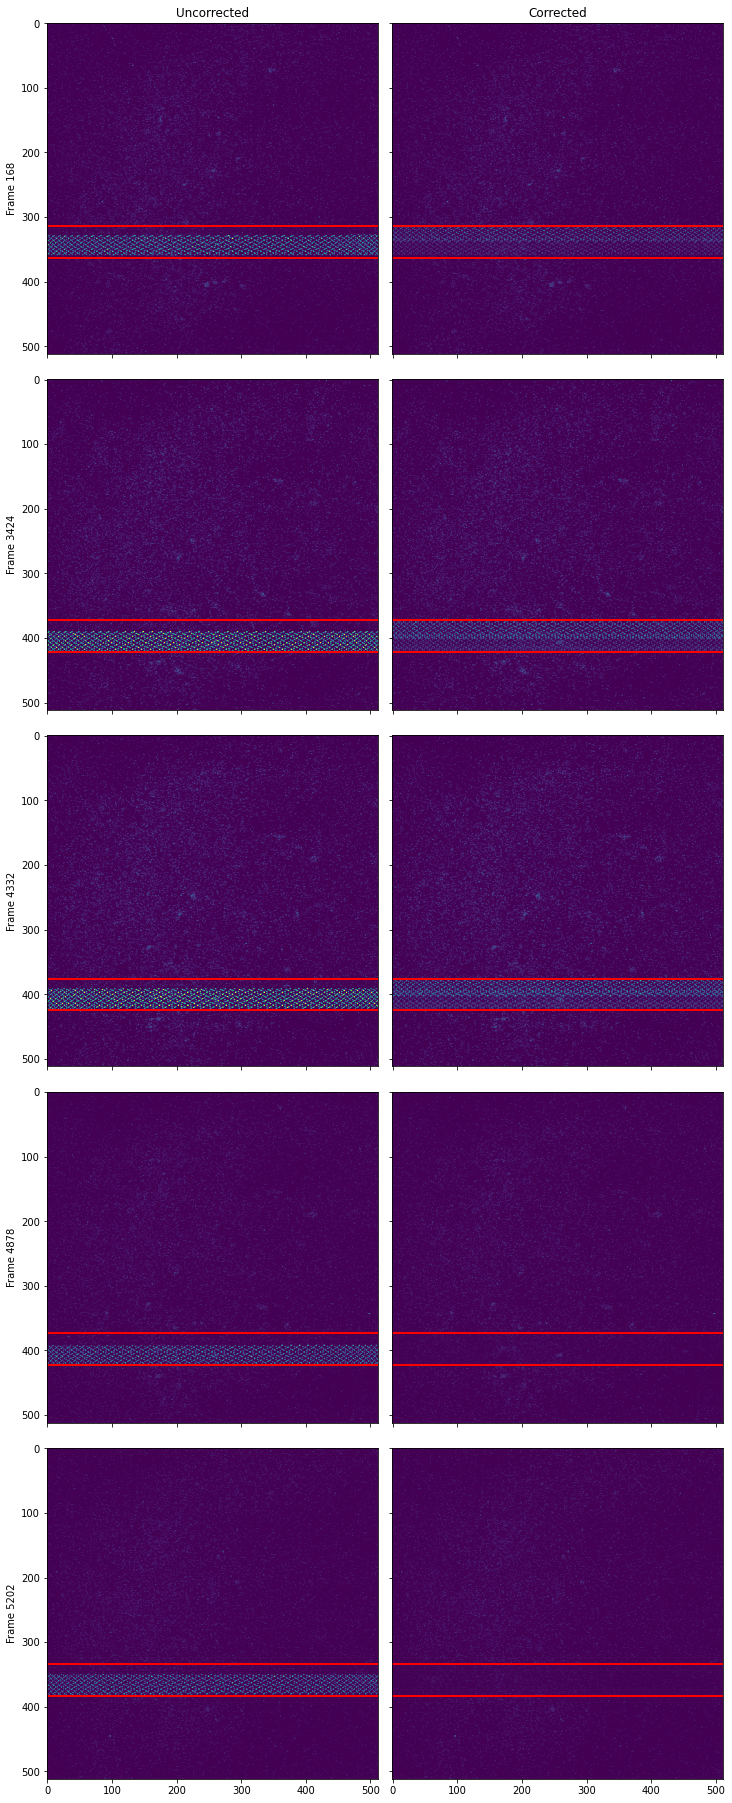

In [14]:
ncols = 2;
_, axes = plt.subplots(nsamples, ncols, figsize=(5*ncols, 5*nsamples), 
                       sharex=True, sharey=True,
                       constrained_layout=True) 

axes[0][0].set_title('Uncorrected')
axes[0][1].set_title('Corrected')

for row, s in enumerate(samples.itertuples()):
    axes[row][0].set_ylabel('Frame %d' % s.frame)
    axes[row][0].imshow(uncorrected[s.frame, s.z_plane],vmin=corrected[s.frame,s.z_plane].min(),vmax=corrected[s.frame,s.z_plane].max())
    axes[row][0].axhline(s.y_min, c='r', lw=2)
    axes[row][0].axhline(s.y_max, c='r', lw=2)
    axes[row][1].imshow(corrected[s.frame, s.z_plane])
    axes[row][1].axhline(s.y_min, c='r', lw=2)
    axes[row][1].axhline(s.y_max, c='r', lw=2)

In [1]:
nsamples = 5
samples = artefact[:nsamples].reset_index()
ncols = 6;
_, axes = plt.subplots(nsamples, ncols, figsize=(5*ncols, 5*nsamples), 
                       sharex=True, sharey=True,
                       constrained_layout=True) 

for icol, ii in enumerate(range(-1,2)):
    axes[0][icol].set_title('Uncorrected: {}'.format(ii),fontsize=20)
    axes[0][icol+3].set_title('Corrected: {}'.format(ii),fontsize=20)


for row, s in enumerate(samples.itertuples()):
    axes[row][0].set_ylabel('Frame {} ,plane {}'.format(s.frame,s.z_plane), fontsize=20)
    for icol,ii in enumerate(range(-1,2)):
        axes[row][icol].imshow(uncorrected[s.frame+ii, s.z_plane],vmin=corrected[s.frame,s.z_plane].min(),vmax=corrected[s.frame,s.z_plane].max())
        axes[row][icol].axhline(s.y_min, c='r', lw=2)
        axes[row][icol].axhline(s.y_max, c='r', lw=2)
        axes[row][icol+3].imshow(corrected[s.frame+ii, s.z_plane],vmin=corrected[s.frame,s.z_plane].min(),vmax=corrected[s.frame,s.z_plane].max())
        axes[row][icol+3].axhline(s.y_min, c='r', lw=2)
        axes[row][icol+3].axhline(s.y_max, c='r', lw=2)

NameError: name 'artefact' is not defined

In [ ]:
plt.imshow(uncorrected[149,1])